### Load dataset from Gdrive and unzip

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Brownspot.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Bacterialblight.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [5]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Blast.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

### Split dataset into train, val

In [6]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the path to your dataset directory
dataset_path = '/content/dataset'

# Set the path to the new train/val directory
train_val_path = '/content/dataset'

# Create train/val directories if they don't exist
os.makedirs(os.path.join(train_val_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(train_val_path, 'val'), exist_ok=True)

# List the classes in your dataset
classes = ['Bacterialblight', 'Brownspot', 'Blast']

# Loop through each class
for class_name in classes:
    # Create train/val directories for each class
    os.makedirs(os.path.join(train_val_path, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(train_val_path, 'val', class_name), exist_ok=True)

    # Get the list of image files for the current class
    class_path = os.path.join(dataset_path, class_name)
    files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    # Split the files into train and val sets
    train_files, val_files = train_test_split(files, test_size=0.2, random_state=42)

    # Move the files to the corresponding train and val directories
    for file in train_files:
        src_path = os.path.join(class_path, file)
        dest_path = os.path.join(train_val_path, 'train', class_name, file)
        shutil.copy(src_path, dest_path)

    for file in val_files:
        src_path = os.path.join(class_path, file)
        dest_path = os.path.join(train_val_path, 'val', class_name, file)
        shutil.copy(src_path, dest_path)

print("Dataset split into train and val successfully.")


Dataset split into train and val successfully.


In [7]:
# Print the number of items in each folder
for class_name in classes:
  train_count = len(os.listdir(os.path.join(train_val_path, 'train', class_name)))
  val_count = len(os.listdir(os.path.join(train_val_path, 'val', class_name)))

  print(f"Class: {class_name}, Train items: {train_count}, Val items: {val_count}")


Class: Bacterialblight, Train items: 288, Val items: 72
Class: Brownspot, Train items: 288, Val items: 72
Class: Blast, Train items: 288, Val items: 72


### Install yolo dependencies, and start training

In [8]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 3.9 MB/s eta 0:00:00


In [9]:
import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n-cls.pt")  # load a pretained model

# Use the model
DATA_DIR = "/content/dataset"
results = model.train(data=DATA_DIR, epochs=50, imgsz=64)  # train the model


100%|██████████| 5.30M/5.30M [00:00<00:00, 69.2MB/s]


Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/dataset, epochs=50, time=None, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 6.23M/6.23M [00:00<00:00, 85.0MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/dataset/train... 864 images, 0 corrupt: 100%|██████████| 864/864 [00:00<00:00, 3730.61it/s]

train: New cache created: /content/dataset/train.cache



val: Scanning /content/dataset/val... 216 images, 0 corrupt: 100%|██████████| 216/216 [00:00<00:00, 2352.45it/s]

val: New cache created: /content/dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.394G       1.18         16         64:  17%|█▋        | 9/54 [00:01<00:05,  7.98it/s]

       1/50     0.394G      1.178         16         64:  33%|███▎      | 18/54 [00:03<00:04,  8.33it/s]
100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]

                   all      0.718          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 20.15it/s]

                   all      0.838          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 21.58it/s]


                   all      0.866          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 13.44it/s]

                   all      0.931          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 17.96it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 20.00it/s]

                   all      0.935          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]

                   all      0.921          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 14.30it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 23.70it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50     0.373G     0.2456         16         64: 100%|██████████| 54/54 [00:03<00:00, 16.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 19.16it/s]

                   all       0.94          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50     0.373G     0.2294         16         64: 100%|██████████| 54/54 [00:04<00:00, 12.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 11.34it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50     0.373G     0.1883         16         64: 100%|██████████| 54/54 [00:04<00:00, 13.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 16.03it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50     0.373G     0.2024         16         64: 100%|██████████| 54/54 [00:03<00:00, 17.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 17.73it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50     0.373G     0.2295         16         64: 100%|██████████| 54/54 [00:03<00:00, 16.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 18.49it/s]

                   all       0.94          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50     0.373G     0.1942         16         64: 100%|██████████| 54/54 [00:05<00:00, 10.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 10.34it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50     0.373G     0.2121         16         64: 100%|██████████| 54/54 [00:03<00:00, 15.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 19.69it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50     0.373G     0.1309         16         64: 100%|██████████| 54/54 [00:03<00:00, 16.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 18.94it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50     0.373G     0.1648         16         64: 100%|██████████| 54/54 [00:03<00:00, 14.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.68it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50     0.373G     0.1649         16         64: 100%|██████████| 54/54 [00:04<00:00, 11.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 19.76it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50     0.373G     0.1349         16         64: 100%|██████████| 54/54 [00:03<00:00, 17.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 20.51it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50     0.373G     0.1192         16         64: 100%|██████████| 54/54 [00:03<00:00, 17.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 20.52it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50     0.373G     0.1244         16         64: 100%|██████████| 54/54 [00:04<00:00, 12.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 13.90it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50     0.373G     0.1538         16         64: 100%|██████████| 54/54 [00:03<00:00, 13.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 18.05it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50     0.373G    0.09898         16         64: 100%|██████████| 54/54 [00:03<00:00, 17.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 20.04it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50     0.373G     0.1614         16         64: 100%|██████████| 54/54 [00:03<00:00, 16.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 23.11it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50     0.373G     0.1362         16         64: 100%|██████████| 54/54 [00:04<00:00, 11.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.81it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50     0.373G     0.1023         16         64: 100%|██████████| 54/54 [00:03<00:00, 16.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 18.52it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50     0.373G     0.1119         16         64: 100%|██████████| 54/54 [00:03<00:00, 17.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 17.93it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50     0.373G      0.109         16         64: 100%|██████████| 54/54 [00:03<00:00, 15.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 10.30it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50     0.373G     0.1008         16         64: 100%|██████████| 54/54 [00:04<00:00, 10.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 21.94it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50     0.373G     0.1295         16         64: 100%|██████████| 54/54 [00:03<00:00, 16.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 22.45it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50     0.373G     0.1213         16         64: 100%|██████████| 54/54 [00:03<00:00, 16.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 21.97it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50     0.373G     0.1064         16         64: 100%|██████████| 54/54 [00:04<00:00, 12.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.58it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50     0.373G     0.1172         16         64: 100%|██████████| 54/54 [00:04<00:00, 12.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 20.84it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50     0.373G     0.1069         16         64: 100%|██████████| 54/54 [00:03<00:00, 16.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 21.55it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50     0.373G    0.09236         16         64: 100%|██████████| 54/54 [00:03<00:00, 17.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 22.43it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50     0.373G     0.1147         16         64: 100%|██████████| 54/54 [00:04<00:00, 10.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 11.64it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50     0.373G    0.09121         16         64: 100%|██████████| 54/54 [00:03<00:00, 15.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 20.88it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50     0.373G      0.083         16         64: 100%|██████████| 54/54 [00:03<00:00, 17.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 20.62it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50     0.373G    0.08575         16         64: 100%|██████████| 54/54 [00:03<00:00, 16.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 10.21it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50     0.373G    0.08964         16         64: 100%|██████████| 54/54 [00:05<00:00, 10.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 21.03it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50     0.373G     0.0947         16         64: 100%|██████████| 54/54 [00:03<00:00, 16.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 20.33it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50     0.373G    0.09071         16         64: 100%|██████████| 54/54 [00:03<00:00, 16.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 20.15it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50     0.373G    0.08266         16         64: 100%|██████████| 54/54 [00:04<00:00, 11.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 10.71it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50     0.373G    0.09779         16         64: 100%|██████████| 54/54 [00:03<00:00, 13.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 17.81it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50     0.373G     0.1213         16         64: 100%|██████████| 54/54 [00:03<00:00, 16.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 18.75it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50     0.373G    0.06984         16         64: 100%|██████████| 54/54 [00:03<00:00, 16.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 14.16it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50     0.373G    0.08516         16         64: 100%|██████████| 54/54 [00:05<00:00, 10.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 14.71it/s]


                   all      0.968          1

      Epoch    GPU_mem       loss  Instances       Size


      49/50     0.373G    0.08796         16         64: 100%|██████████| 54/54 [00:03<00:00, 15.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 18.18it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50     0.373G     0.0779         16         64: 100%|██████████| 54/54 [00:03<00:00, 16.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 16.84it/s]

                   all      0.977          1



50 epochs completed in 0.066 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 864 images in 3 classes ✅ 
val: /content/dataset/val... found 216 images in 3 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.30it/s]


                   all      0.981          1
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


### Visualize the train/val loss and accuracy

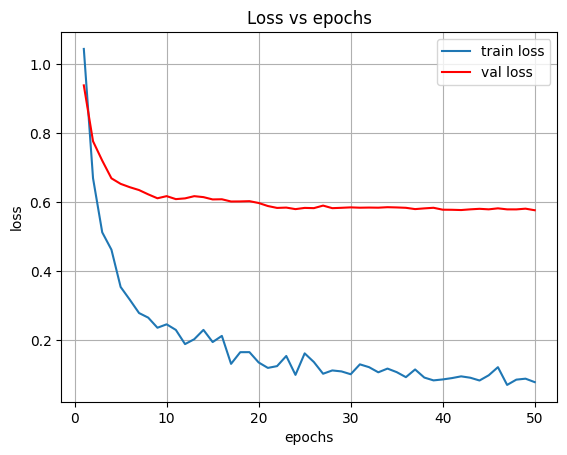

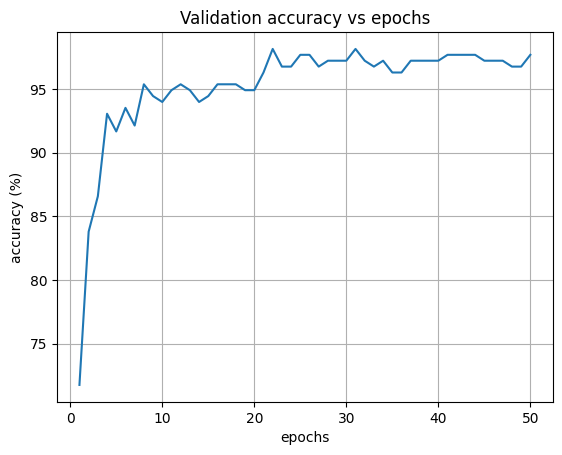

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt


results_path = '/content/runs/classify/train/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

### Predict with test images

In [11]:
pip install matplotlib pillow


In [16]:
zip_ref = zipfile.ZipFile("/content/captured_images.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

#then rename the 'captured_images' to 'test'


image 1/1 /content/dataset/test/Paddy7.jpg: 64x64 Bacterialblight 1.00, Blast 0.00, Brownspot 0.00, 13.0ms
Speed: 2.9ms preprocess, 13.0ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


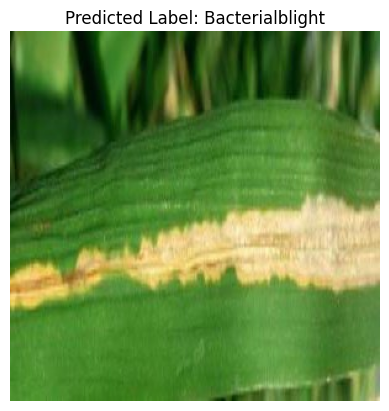


image 1/1 /content/dataset/test/Paddy5.jpg: 64x64 Bacterialblight 0.96, Brownspot 0.03, Blast 0.01, 7.9ms
Speed: 7.1ms preprocess, 7.9ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


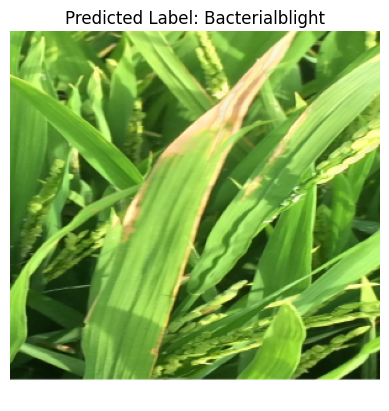


image 1/1 /content/dataset/test/Paddy3.jpg: 64x64 Brownspot 0.80, Blast 0.20, Bacterialblight 0.00, 5.8ms
Speed: 7.8ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


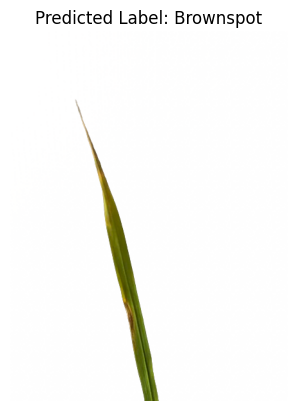


image 1/1 /content/dataset/test/Paddy6.jpg: 64x64 Blast 1.00, Brownspot 0.00, Bacterialblight 0.00, 5.6ms
Speed: 2.8ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


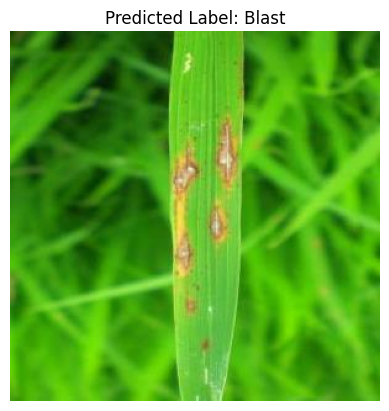


image 1/1 /content/dataset/test/Paddy2.jpg: 64x64 Brownspot 1.00, Bacterialblight 0.00, Blast 0.00, 9.8ms
Speed: 2.8ms preprocess, 9.8ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


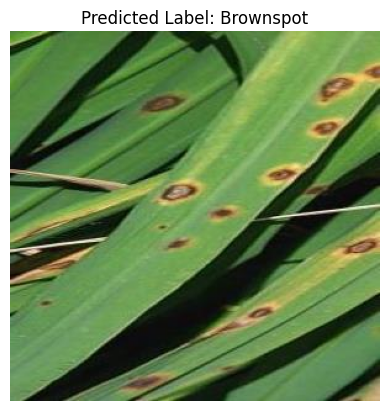


image 1/1 /content/dataset/test/Paddy1.jpg: 64x64 Brownspot 0.55, Blast 0.45, Bacterialblight 0.00, 7.7ms
Speed: 4.9ms preprocess, 7.7ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


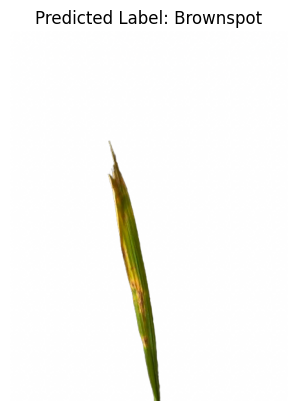

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

model = YOLO('/content/runs/classify/train/weights/best.pt')  # load a custom model

# Set the path to the 'test' folder
test_folder = '/content/dataset/test/'

# Iterate through all files in the 'test' folder
for filename in os.listdir(test_folder):
    if filename.endswith(".jpg") or filename.endswith(".PNG"):
        # Construct the full path to the image
        image_path = os.path.join(test_folder, filename)

        # Predict on the current image
        results = model(image_path)

        # Extract names and probabilities
        names_dict = results[0].names
        probs = results[0].probs.data.tolist()

        # Get the predicted class
        predicted_class = names_dict[np.argmax(probs)]

        # Display the image and the predicted label
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f"Predicted Label: {predicted_class}")
        plt.axis('off')
        plt.show()

In [ ]:
import torch
from ultralytics import YOLO

# Assuming 'model' is your trained YOLO model
model = YOLO("yolov8n-cls.pt")  # Load a pretrained model or replace with your model instantiation

# Save the model's state dictionary
saved_model_path = "drive/MyDrive/yolomodel/paddydisease.pt"
torch.save(model.state_dict(), saved_model_path)

# Instantiate the YOLO model with the same architecture
loaded_model = YOLO("yolov8n-cls.pt")  # Use the same architecture parameters or replace with your model instantiation

# Load the saved weights
loaded_model.load_state_dict(torch.load(saved_model_path))

# Set the model to evaluation mode
loaded_model.eval()

# Now 'loaded_model' is ready to use for inference


Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=imagenet10, epochs=100, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

train: Scanning /content/datasets/imagenet10/train... 12 images, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
val: Scanning /content/datasets/imagenet10/val... 12 images, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.535G      2.243         12        224: 100%|██████████| 1/1 [00:20<00:00, 20.75s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.92it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.401G      2.224         12        224: 100%|██████████| 1/1 [00:00<00:00, 15.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.57it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.401G      2.241         12        224: 100%|██████████| 1/1 [00:00<00:00, 19.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.47it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.401G      2.322         12        224: 100%|██████████| 1/1 [00:00<00:00, 18.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 65.77it/s]

                   all     0.0833       0.75



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.401G      2.247         12        224: 100%|██████████| 1/1 [00:00<00:00, 14.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 66.06it/s]

                   all     0.0833       0.75



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.401G      2.166         12        224: 100%|██████████| 1/1 [00:00<00:00, 19.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.88it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.401G      2.103         12        224: 100%|██████████| 1/1 [00:00<00:00, 14.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.28it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.401G      2.134         12        224: 100%|██████████| 1/1 [00:00<00:00, 17.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.78it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.401G      2.048         12        224: 100%|██████████| 1/1 [00:00<00:00, 19.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.55it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.401G      2.042         12        224: 100%|██████████| 1/1 [00:00<00:00, 17.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.37it/s]

                   all      0.167      0.667



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.401G      2.032         12        224: 100%|██████████| 1/1 [00:00<00:00, 18.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.41it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.401G      1.982         12        224: 100%|██████████| 1/1 [00:00<00:00, 14.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.05it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.401G      1.964         12        224: 100%|██████████| 1/1 [00:00<00:00, 16.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.12it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.401G      1.833         12        224: 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.09it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.401G      1.842         12        224: 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.96it/s]

                   all      0.167      0.667



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.401G      1.805         12        224: 100%|██████████| 1/1 [00:00<00:00, 12.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.36it/s]

                   all      0.167      0.667



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.401G      1.671         12        224: 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.02it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.401G      1.646         12        224: 100%|██████████| 1/1 [00:00<00:00, 12.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.97it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.401G      1.701         12        224: 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.15it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.401G      1.598         12        224: 100%|██████████| 1/1 [00:00<00:00, 12.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.24it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.401G      1.681         12        224: 100%|██████████| 1/1 [00:00<00:00, 13.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.89it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.401G      1.604         12        224: 100%|██████████| 1/1 [00:00<00:00, 12.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.15it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.401G      1.492         12        224: 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.68it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.401G      1.388         12        224: 100%|██████████| 1/1 [00:00<00:00, 27.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.37it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.401G      1.503         12        224: 100%|██████████| 1/1 [00:00<00:00, 15.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.58it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.401G      1.526         12        224: 100%|██████████| 1/1 [00:00<00:00, 20.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.32it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.401G      1.453         12        224: 100%|██████████| 1/1 [00:00<00:00, 16.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 81.49it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.401G      1.342         12        224: 100%|██████████| 1/1 [00:00<00:00, 18.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.64it/s]

                   all      0.167       0.75



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.401G      1.312         12        224: 100%|██████████| 1/1 [00:00<00:00, 19.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.61it/s]

                   all      0.167      0.833



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.401G      1.338         12        224: 100%|██████████| 1/1 [00:00<00:00, 26.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.00it/s]

                   all      0.167      0.833



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.401G      1.331         12        224: 100%|██████████| 1/1 [00:00<00:00, 18.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.86it/s]

                   all      0.167      0.833



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.401G      1.223         12        224: 100%|██████████| 1/1 [00:00<00:00, 26.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.68it/s]

                   all      0.167      0.833



      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.401G      1.252         12        224: 100%|██████████| 1/1 [00:00<00:00, 14.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.92it/s]

                   all      0.167      0.833



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.401G      1.212         12        224: 100%|██████████| 1/1 [00:00<00:00, 29.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.93it/s]

                   all      0.167      0.833



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.401G      1.159         12        224: 100%|██████████| 1/1 [00:00<00:00, 11.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.27it/s]

                   all      0.167      0.833



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.401G      1.089         12        224: 100%|██████████| 1/1 [00:00<00:00, 30.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.09it/s]

                   all      0.167      0.833



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.401G      1.125         12        224: 100%|██████████| 1/1 [00:00<00:00, 18.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.95it/s]

                   all      0.167      0.833



      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.401G      1.147         12        224: 100%|██████████| 1/1 [00:00<00:00, 22.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.13it/s]

                   all      0.167      0.833



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.401G      1.109         12        224: 100%|██████████| 1/1 [00:00<00:00, 19.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.46it/s]

                   all       0.25      0.833



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.401G       1.04         12        224: 100%|██████████| 1/1 [00:00<00:00, 27.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.88it/s]

                   all       0.25      0.833



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.401G      1.185         12        224: 100%|██████████| 1/1 [00:00<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.88it/s]

                   all       0.25      0.833



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.401G       1.08         12        224: 100%|██████████| 1/1 [00:00<00:00, 20.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 69.80it/s]

                   all       0.25      0.833



      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.401G      1.054         12        224: 100%|██████████| 1/1 [00:00<00:00, 18.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.69it/s]

                   all       0.25      0.833



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.401G     0.9295         12        224: 100%|██████████| 1/1 [00:00<00:00, 28.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.75it/s]

                   all       0.25      0.833



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.401G     0.8063         12        224: 100%|██████████| 1/1 [00:00<00:00, 16.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.58it/s]

                   all       0.25      0.833



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.401G     0.7853         12        224: 100%|██████████| 1/1 [00:00<00:00, 25.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.49it/s]

                   all       0.25      0.833



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.401G      0.908         12        224: 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.58it/s]

                   all       0.25      0.833



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.401G     0.8091         12        224: 100%|██████████| 1/1 [00:00<00:00, 20.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.68it/s]

                   all       0.25      0.833



      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.401G     0.9376         12        224: 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 62.84it/s]

                   all       0.25      0.833



      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.401G     0.8571         12        224: 100%|██████████| 1/1 [00:00<00:00, 14.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.60it/s]

                   all       0.25      0.833



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.401G     0.7792         12        224: 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.52it/s]


                   all       0.25      0.833

      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.401G     0.7079         12        224: 100%|██████████| 1/1 [00:00<00:00, 17.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.37it/s]

                   all       0.25      0.833



      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.401G     0.7568         12        224: 100%|██████████| 1/1 [00:00<00:00, 12.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.74it/s]

                   all       0.25      0.833



      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.401G     0.8376         12        224: 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 56.65it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.401G     0.7219         12        224: 100%|██████████| 1/1 [00:00<00:00, 14.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.95it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.401G     0.5924         12        224: 100%|██████████| 1/1 [00:00<00:00, 20.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.74it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.401G     0.7237         12        224: 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.19it/s]

                   all      0.333      0.917



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.401G      0.591         12        224: 100%|██████████| 1/1 [00:00<00:00, 21.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.79it/s]

                   all      0.333      0.917



      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.401G     0.7409         12        224: 100%|██████████| 1/1 [00:00<00:00, 19.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.12it/s]

                   all      0.333      0.917



      Epoch    GPU_mem       loss  Instances       Size


     60/100     0.401G     0.5927         12        224: 100%|██████████| 1/1 [00:00<00:00, 17.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.16it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     61/100     0.401G     0.6454         12        224: 100%|██████████| 1/1 [00:00<00:00, 20.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.38it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.401G     0.5886         12        224: 100%|██████████| 1/1 [00:00<00:00, 23.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.72it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.401G     0.5626         12        224: 100%|██████████| 1/1 [00:00<00:00, 16.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.29it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     64/100     0.401G     0.5727         12        224: 100%|██████████| 1/1 [00:00<00:00, 18.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.96it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     65/100     0.401G     0.6162         12        224: 100%|██████████| 1/1 [00:00<00:00, 20.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.95it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     66/100     0.401G     0.5731         12        224: 100%|██████████| 1/1 [00:00<00:00, 16.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 66.20it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     67/100     0.401G     0.6118         12        224: 100%|██████████| 1/1 [00:00<00:00, 19.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.87it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     68/100     0.401G     0.4653         12        224: 100%|██████████| 1/1 [00:00<00:00, 23.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.34it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     69/100     0.401G     0.5751         12        224: 100%|██████████| 1/1 [00:00<00:00, 15.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 51.47it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     70/100     0.401G     0.5426         12        224: 100%|██████████| 1/1 [00:00<00:00, 22.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 60.54it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     71/100     0.401G     0.5682         12        224: 100%|██████████| 1/1 [00:00<00:00, 22.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.40it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     72/100     0.401G     0.5081         12        224: 100%|██████████| 1/1 [00:00<00:00, 17.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 63.51it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     73/100     0.401G     0.4241         12        224: 100%|██████████| 1/1 [00:00<00:00, 24.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 59.67it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     74/100     0.401G     0.4596         12        224: 100%|██████████| 1/1 [00:00<00:00, 23.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 38.96it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     75/100     0.401G     0.5164         12        224: 100%|██████████| 1/1 [00:00<00:00, 15.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 46.72it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     76/100     0.401G     0.4467         12        224: 100%|██████████| 1/1 [00:00<00:00, 19.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.14it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     77/100     0.401G     0.4252         12        224: 100%|██████████| 1/1 [00:00<00:00, 21.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.22it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     78/100     0.401G     0.5008         12        224: 100%|██████████| 1/1 [00:00<00:00, 16.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.54it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     79/100     0.401G     0.5199         12        224: 100%|██████████| 1/1 [00:00<00:00, 14.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 61.88it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     80/100     0.401G     0.4739         12        224: 100%|██████████| 1/1 [00:00<00:00, 16.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.05it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     81/100     0.401G     0.3235         12        224: 100%|██████████| 1/1 [00:00<00:00, 17.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.31it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     82/100     0.401G      0.402         12        224: 100%|██████████| 1/1 [00:00<00:00, 22.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.49it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     83/100     0.401G     0.3977         12        224: 100%|██████████| 1/1 [00:00<00:00, 24.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.91it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     84/100     0.401G     0.3151         12        224: 100%|██████████| 1/1 [00:00<00:00, 14.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.71it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     85/100     0.401G     0.3676         12        224: 100%|██████████| 1/1 [00:00<00:00, 27.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.57it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     86/100     0.401G     0.4763         12        224: 100%|██████████| 1/1 [00:00<00:00, 26.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 81.35it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     87/100     0.401G     0.3473         12        224: 100%|██████████| 1/1 [00:00<00:00, 26.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 57.54it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     88/100     0.401G      0.404         12        224: 100%|██████████| 1/1 [00:00<00:00,  9.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.35it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     89/100     0.401G     0.3918         12        224: 100%|██████████| 1/1 [00:00<00:00, 14.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.37it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     90/100     0.401G     0.3414         12        224: 100%|██████████| 1/1 [00:00<00:00, 16.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.18it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     91/100     0.401G      0.345         12        224: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.79it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     92/100     0.401G     0.5499         12        224: 100%|██████████| 1/1 [00:00<00:00,  9.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.95it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     93/100     0.401G     0.3622         12        224: 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.62it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     94/100     0.401G     0.3309         12        224: 100%|██████████| 1/1 [00:00<00:00, 14.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 43.44it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     95/100     0.401G      0.325         12        224: 100%|██████████| 1/1 [00:00<00:00, 20.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 44.19it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     96/100     0.401G     0.3772         12        224: 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.24it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     97/100     0.401G      0.428         12        224: 100%|██████████| 1/1 [00:00<00:00, 24.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.73it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     98/100     0.401G     0.3501         12        224: 100%|██████████| 1/1 [00:00<00:00, 15.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 43.95it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


     99/100     0.401G      0.343         12        224: 100%|██████████| 1/1 [00:00<00:00, 21.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.74it/s]

                   all       0.25      0.917



      Epoch    GPU_mem       loss  Instances       Size


    100/100     0.401G     0.2821         12        224: 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.11it/s]

                   all       0.25      0.917



100 epochs completed in 0.019 hours.
Optimizer stripped from runs/classify/train4/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train4/weights/best.pt, 3.0MB

Validating runs/classify/train4/weights/best.pt...
Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1447690 parameters, 0 gradients, 3.3 GFLOPs
train: /content/datasets/imagenet10/train... found 12 images in 10 classes ✅ 
val: /content/datasets/imagenet10/val... found 12 images in 10 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 58.08it/s]


                   all      0.333      0.917
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train4
Results saved to runs/classify/train4


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e73313c5450>
curves: []
curves_results: []
fitness: 0.6250000149011612
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.3333333432674408, 'metrics/accuracy_top5': 0.9166666865348816, 'fitness': 0.6250000149011612}
save_dir: PosixPath('runs/classify/train4')
speed: {'preprocess': 0.07818142573038737, 'inference': 0.6084243456522623, 'loss': 0.0013907750447591145, 'postprocess': 0.001152356465657552}
task: 'classify'
top1: 0.3333333432674408
top5: 0.9166666865348816